# Lab 8

## 19th March 

<hr>

# Libraries

In [ ]:
library()

Ridge regression

In [72]:
library(glmnet)

Correlation plot

In [56]:
library(psych)

Linear regression assumption checks

In [38]:
library(gvlma)

plots and mutation

In [5]:
library(dplyr)

plots

In [18]:
library(ggplot2)

# Data

Loading data

In [13]:
df <- read.csv('tata_nse_stocks.csv')

head

In [14]:
head(df)

Date,Open,High,Low,Last,Close,Total.Trade.Quantity,Turnover..Lacs.
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749,3486.05
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


changing the trade quantity into lacs

In [15]:
df <- df %>% 
   mutate(Total.Trade.Quantity = Total.Trade.Quantity/100000)

In [16]:
head(df)

Date,Open,High,Low,Last,Close,Total.Trade.Quantity,Turnover..Lacs.
2018-10-08,208.00,222.25,206.85,216.00,215.15,46.42146,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,35.19515,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,17.28786,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,17.08590,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,15.34749,3486.05
2018-09-28,234.05,235.95,230.20,233.50,233.75,30.69914,7162.35


# Plots

setting theme

In [21]:
theme_set(theme_light())

Plotting the data

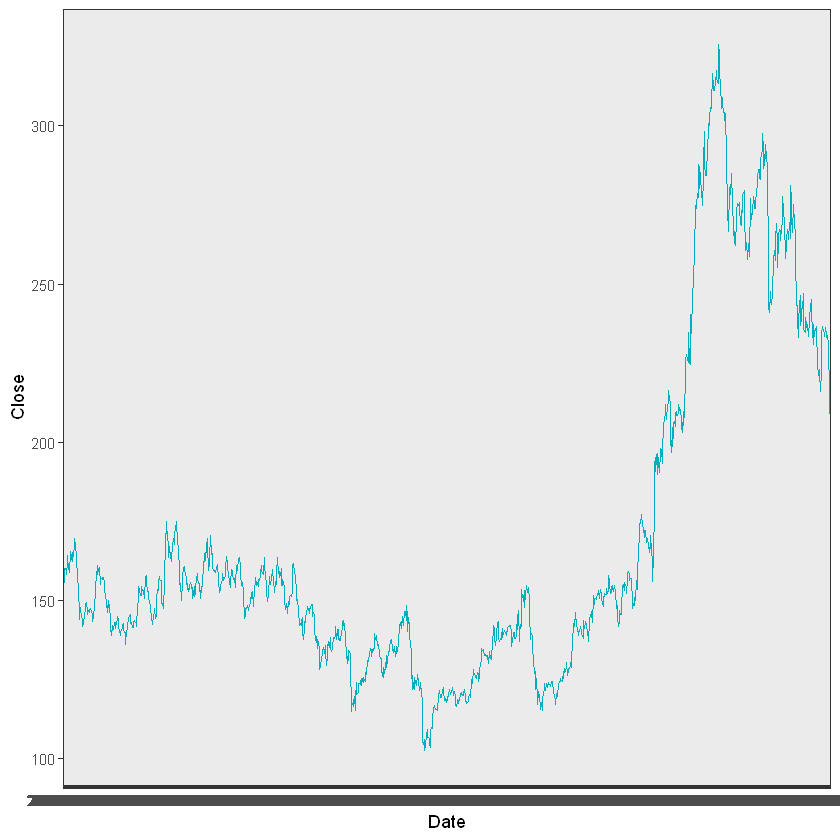

In [28]:
ggplot(df, aes(x=Date,group=1)) +
geom_line(aes(y=Close,group=1),color = "#00AFBB")

In [30]:
df = subset(df, select = -c(Date) )

In [31]:
head(df)

Open,High,Low,Last,Close,Total.Trade.Quantity,Turnover..Lacs.
208.00,222.25,206.85,216.00,215.15,46.42146,10062.83
217.00,218.60,205.90,210.25,209.20,35.19515,7407.06
223.50,227.80,216.15,217.25,218.20,17.28786,3815.79
230.00,237.50,225.75,226.45,227.60,17.08590,3960.27
234.55,234.60,221.05,230.30,230.90,15.34749,3486.05
234.05,235.95,230.20,233.50,233.75,30.69914,7162.35


Correlation Plot

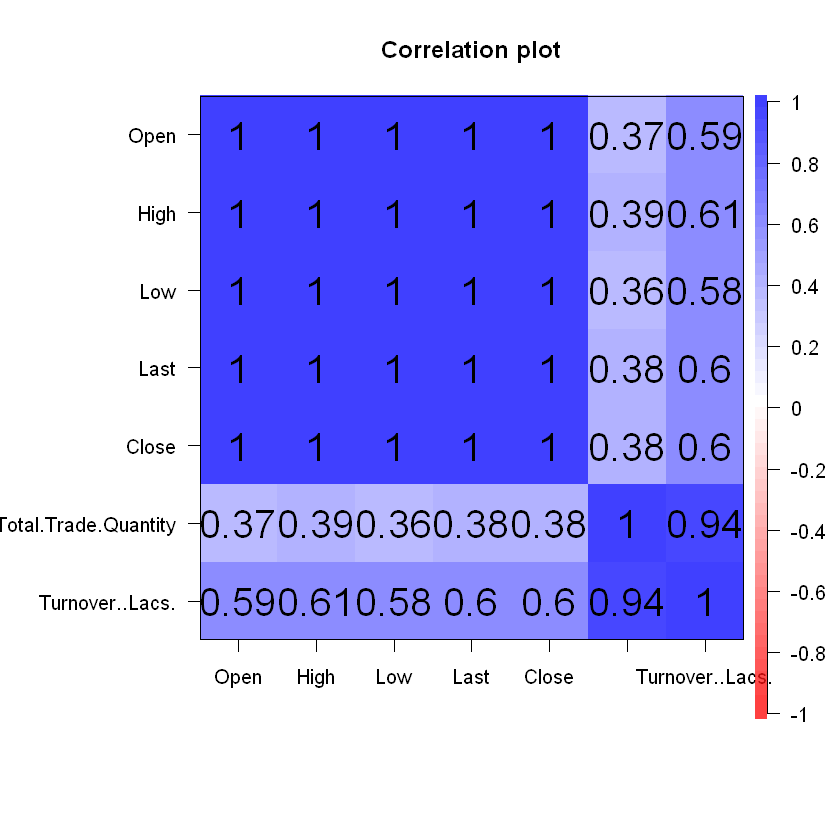

In [57]:
corPlot(df)

Since open,high,low and last are highly correlated, we need to drop them

In [58]:
df = subset(df, select = -c(Open,High,Low,Last) )

# Modelling

In [ ]:
msk<-sample.split(data$Profit,SplitRatio = 0.7)

## Model 1

In [59]:
model1 <- lm(Turnover..Lacs. ~ Close+Total.Trade.Quantity,
           data = df)

In [60]:
summary(model1)


Call:
lm(formula = Turnover..Lacs. ~ Close + Total.Trade.Quantity, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6337.6  -531.4    -1.6   478.2 13918.9 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -5188.3397   110.7778  -46.84   <2e-16 ***
Close                   29.1839     0.6787   43.00   <2e-16 ***
Total.Trade.Quantity   196.1206     1.5364  127.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1136 on 1232 degrees of freedom
Multiple R-squared:  0.9549,	Adjusted R-squared:  0.9549 
F-statistic: 1.305e+04 on 2 and 1232 DF,  p-value: < 2.2e-16


## Looking at assumptions

In [61]:
gvl1 <- gvlma(model1)

In [63]:
gvl1


Call:
lm(formula = Turnover..Lacs. ~ Close + Total.Trade.Quantity, 
    data = df)

Coefficients:
         (Intercept)                 Close  Total.Trade.Quantity  
            -5188.34                 29.18                196.12  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model1) 

                     Value p-value                   Decision
Global Stat        40398.1       0 Assumptions NOT satisfied!
Skewness            1311.3       0 Assumptions NOT satisfied!
Kurtosis           38634.3       0 Assumptions NOT satisfied!
Link Function        207.6       0 Assumptions NOT satisfied!
Heteroscedasticity   245.0       0 Assumptions NOT satisfied!

## Plotting

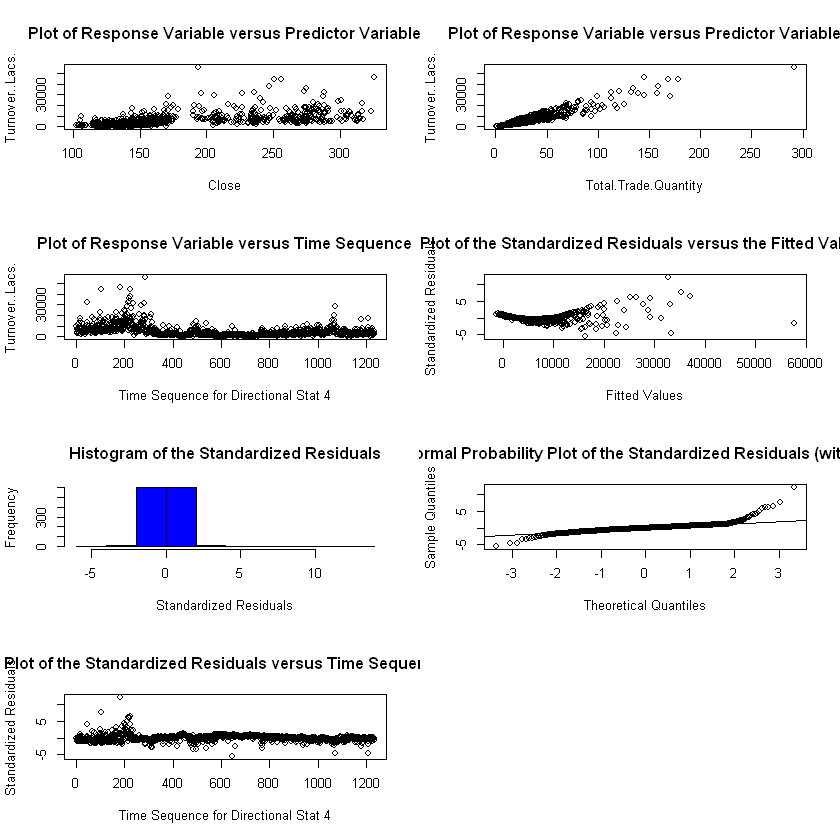

In [62]:
plot.gvlma(gvl1)

## Model 2

In [64]:
model2 <- lm(Turnover..Lacs. ~ Close,
           data = df)

In [68]:
summary(model2)


Call:
lm(formula = Turnover..Lacs. ~ Close, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8766  -1607   -796    586  49350 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5647.769    417.432  -13.53   <2e-16 ***
Close          62.175      2.366   26.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4284 on 1233 degrees of freedom
Multiple R-squared:  0.359,	Adjusted R-squared:  0.3585 
F-statistic: 690.5 on 1 and 1233 DF,  p-value: < 2.2e-16


## Assumptions

In [65]:
gvl2 <- gvlma(model2)

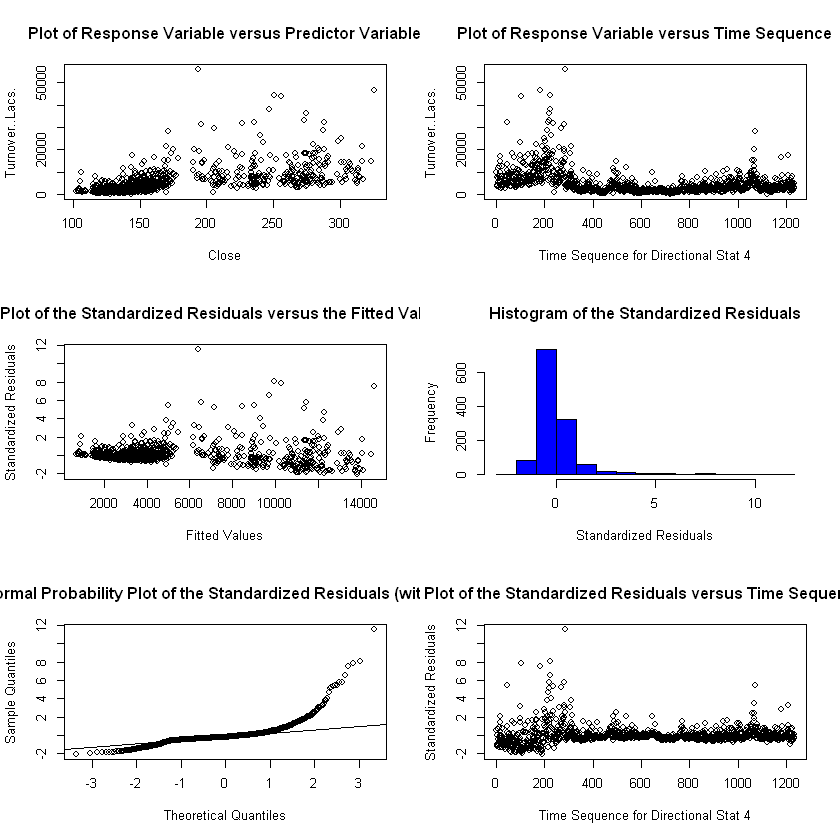

In [66]:
plot.gvlma(gvl2)

In [67]:
gvl2


Call:
lm(formula = Turnover..Lacs. ~ Close, data = df)

Coefficients:
(Intercept)        Close  
   -5647.77        62.18  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = model2) 

                      Value   p-value                   Decision
Global Stat        48585.82 0.000e+00 Assumptions NOT satisfied!
Skewness            3438.65 0.000e+00 Assumptions NOT satisfied!
Kurtosis           44717.14 0.000e+00 Assumptions NOT satisfied!
Link Function         18.27 1.914e-05 Assumptions NOT satisfied!
Heteroscedasticity   411.76 0.000e+00 Assumptions NOT satisfied!

In [ ]:
dummies <- dummyVars(Turnover..Lacs. ~., data = df)
train_dummies <- predict(dummies , newdata = train)
test_dummies <- predict(dummies , newdata = test)
print(dim(train_dummies)); print(dim(test_dummies))